Name: Adnan Shaikh<br>
Batch: 10224

### Project Statement:

Everyone needs to complete one end-to-end project on NLP, where you will be taking dataset from any online repository(like Kaggle, UCI repository, Github, etc.) and you need to have complex data with more than 5000+ comments or texts or reviews

Your project should have data cleaning, EDA, feature engineering, scaling, normalizing, splitting of data into different sets, model training, validating, testing and model evaluation steps involved.

### Importing the required libraries.

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk

import warnings
warnings.filterwarnings('ignore')

### Loading the required Datasets.

In [3]:
fake = pd.read_csv("C:/AdnanData/projects/codingResources/datasets/fakenews/Fake.csv")
true = pd.read_csv("C:/AdnanData/projects/codingResources/datasets/fakenews/True.csv")

In [73]:
display(fake.head(), true.head())

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


### Adding a column to label the fake and true news accordingly.

In [5]:
fake['true'] = 0
fake['true'] = fake['true'].astype(bool)
true['true'] = 1
true['true'] = true['true'].astype(bool)
display(fake.head(), true.head())

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


Adding labels for true and false news so that we can concatinate the dataset and still be able to identify the true and fake news.

### Concatinating the two datasets to create a single dataset.

In [6]:
news = pd.concat([fake, true], ignore_index=True)
news.head()

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


### Shuffling the order of the rows for diversity in future data splits.

In [7]:
news = news.sample(frac = 1, random_state = 42).reset_index(drop=True)
news.head(10)

,title,text,subject,date,true
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",False
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",True
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",True
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",False
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",True
5,Paul Ryan Responds To Dem’s Sit-In On Gun Con...,"On Wednesday, Democrats took a powerful stance...",News,"June 22, 2016",False
6,AWESOME! DIAMOND AND SILK Rip Into The Press: ...,President Trump s rally in FL on Saturday was ...,Government News,"Feb 19, 2017",False
7,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,left-news,"Mar 8, 2016",False
8,North Korea shows no sign it is serious about ...,WASHINGTON (Reuters) - The State Department sa...,worldnews,"December 13, 2017",True
9,Trump signals willingness to raise U.S. minimu...,(This version of the story corrects the figur...,politicsNews,"May 4, 2016",True


frac=1 to select all the rows and using the random state 42 to shuffle the entries. And then using the reset_index, the index is reset to reflect the change in order.

### Removing not required features

In [8]:
news = news.drop(columns=['subject', 'date'])
news.columns

Index(['title', 'text', 'true'], dtype='object')

As subject and date will not help us in classifying fake and true news we remove the features.

### Removing Empty Values

In [9]:
newstemp = news.copy()

Making a temporary copy to remove duplicate values.

In [10]:
import re

#remove punctuations, whitespaces and leading and trailing whitespaces
newstemp['text'] = newstemp['text'].apply(lambda x: re.sub(r'\s+', '', re.sub(r'[^\w\s]', '', x)).strip())
newstemp['title'] = newstemp['title'].apply(lambda x: re.sub(r'\s+', '', re.sub(r'[^\w\s]', '', x)).strip())
newstemp.head()

,title,text,true
0,BenSteinCallsOut9thCircuitCourtCommittedaCoupd...,21stCenturyWiresaysBenSteinreputableprofessorf...,False
1,TrumpdropsSteveBannonfromNationalSecurityCouncil,WASHINGTONReutersUSPresidentDonaldTrumpremoved...,True
2,PuertoRicoexpectsUStoliftJonesActshippingrestr...,ReutersPuertoRicoGovernorRicardoRossellosaidon...,True
3,OOPSTrumpJustAccidentallyConfirmedHeLeakedIsra...,OnMondayDonaldTrumponceagainembarrassedhimself...,False
4,DonaldTrumpheadsforScotlandtoreopenagolfresort,GLASGOWScotlandReutersMostUSpresidentialcandid...,True


We use the re (support for regex) module to remove symbols and whitespaces. ^\w for characters that are not word character and \s for chracters that are symbols such as ''', '_' etc and replace them with ''. Then we use strip to remove leading and trailing whitespaces. Furthermore we use \s+ and replace it with '' for removing ALL whitespaces in the text after the symbols are removed.


In [11]:
newstemp.isna().sum()

title    0
text     0
true     0
dtype: int64

In [12]:
newstemp.isnull().sum()

title    0
text     0
true     0
dtype: int64

In [13]:
newstemp[newstemp['text'] == ''].head()

,title,text,true
11,WHERESHILLARYCLINTONSPOTTEDDiningAlone,,False
41,WHOARUSHLIMBAUGHRIPSIntoRepublicansWhoDontSupp...,,False
177,HILLARYTAKESCREDITForTheArabSpringDisasterANDS...,,False
324,CHILLINGFOXREPORTERJAMESROSENRecountsBeingSpie...,,False
400,LIVEFEEDINAUGURATION2017,,False


Entries having text with this empty string have to be removed

In [14]:
newstemp = newstemp[newstemp['text'] != '']
newstemp[newstemp['text'] == '']

,title,text,true


In [15]:
newstemp[newstemp['title'] == (' ', '')]

,title,text,true


We have successfully removed any empty/null/na values.

### Checking and Cleaning Duplicate Values

In [16]:
newstemp[['title', 'text']] = newstemp[['title', 'text']].applymap(lambda x: x.lower())

In [17]:
newstemp.duplicated().sum()

5881

In [18]:
newstemp = newstemp.drop_duplicates()
newstemp.duplicated().sum()

0

In [19]:
newstemp.shape

(38386, 3)

In [20]:
newstemp['text'].duplicated().sum()

18

Even though we dropped all duplicate rows, there are some rows which may have different values for other columns but have the same value for text. Hence, we have to check how similiar these entries are.

In [21]:
newstemp[newstemp['text'].duplicated()].head(1)

,title,text,true
4143,whoanewdisturbingvideoshowshillaryscampaignlik...,onseptember15hillaryapparentlyheldarallyintheo...,False


In [22]:
newstemp[newstemp.text == newstemp.loc[4143, 'text']]

,title,text,true
189,disturbingvideoshowshillaryscampaignlikelyfake...,onseptember15hillaryapparentlyheldarallyintheo...,False
4143,whoanewdisturbingvideoshowshillaryscampaignlik...,onseptember15hillaryapparentlyheldarallyintheo...,False


Here some news have the same content but a different headline. We have to remove such duplicates as well.

In [23]:
newstemp = newstemp.drop_duplicates(subset=['text'])
newstemp.text.duplicated().sum()

0

In [24]:
newstemp.title.duplicated().sum()

113

Similarly we check for the title column.

In [25]:
newstemp[newstemp.title.duplicated()].head(1)

,title,text,true
4251,postelectionconundrumawaitsgermanysmerkel,berlinreutersbarringanupsetthemainuncertaintys...,True


In [26]:
newstemp[newstemp['title'] == newstemp.loc[4251, 'title']]

,title,text,true
2105,postelectionconundrumawaitsgermanysmerkel,berlinreutersbarringanupsetthemainuncertaintys...,True
4251,postelectionconundrumawaitsgermanysmerkel,berlinreutersbarringanupsetthemainuncertaintys...,True


Here the content that is the text for both is the same but one of the text is a substring of the other with some extra words hence, we remove these entries.

In [27]:
newstemp = newstemp.drop_duplicates(subset = ['title'])
newstemp.title.duplicated().sum()

0

Successfully removed all duplicates from the database.

In [28]:
indic = newstemp.index.tolist()
news = news.loc[indic]
news.head()

,title,text,true
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",False
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,True
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,True
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",False
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",True


### Removing whitespaces and symbols 

In [29]:
news['text'] = news['text'].apply(lambda x: re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', x.strip())))

In [30]:
news['title'] = news['title'].apply(lambda x: re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', x.strip())))

Again we use the re module to remove symbols and extra whitespaces. Using \s+ and replacing it with ' ' to convert all whitespaces larger than 1 whitespace. Then use ^w\s and replace it with '' for removing symbols and leading and trailing whitespaces.

In [31]:
news.head()

,title,text,true
0,Ben Stein Calls Out 9th Circuit Court Committe...,21st Century Wire says Ben Stein reputable pro...,False
1,Trump drops Steve Bannon from National Securit...,WASHINGTON Reuters US President Donald Trump r...,True
2,Puerto Rico expects US to lift Jones Act shipp...,Reuters Puerto Rico Governor Ricardo Rossello ...,True
3,OOPS Trump Just Accidentally Confirmed He Leak...,On Monday Donald Trump once again embarrassed ...,False
4,Donald Trump heads for Scotland to reopen a go...,GLASGOW Scotland Reuters Most US presidential ...,True


In [32]:
news[['title', 'text']] = news[['title', 'text']].applymap(lambda x : x.lower())
news.head()

,title,text,true
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True


Changing the text to lowercase by taking each string and operating on it using the .lower() string function.

### Tokenization

In [33]:
from nltk.tokenize import word_tokenize

news_copy = news.copy()

In [34]:
news['tkn_title'] = news['title'].apply(word_tokenize)
news['tkn_text'] = news['text'].apply(word_tokenize)
news.head()

,title,text,true,tkn_title,tkn_text
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, calls, out, 9th, circuit, court, ...","[21st, century, wire, says, ben, stein, reputa..."
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drops, steve, bannon, from, national, ...","[washington, reuters, us, president, donald, t..."
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, us, to, lift, jones, a...","[reuters, puerto, rico, governor, ricardo, ros..."
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, just, accidentally, confirmed, h...","[on, monday, donald, trump, once, again, embar..."
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, heads, for, scotland, to, reop...","[glasgow, scotland, reuters, most, us, preside..."


Applying word tokenization and storing the tokens in a new column. It splits the paragraphs into words.

### Removing Stopwords

In [35]:
from nltk.corpus import stopwords

stpwrds = set(stopwords.words('english')).union(set(["the", "a", "is", "on", "in"]))

In [36]:
news['tkn_title'] = news['tkn_title'].apply(lambda x: [word for word in x if word not in stpwrds])
news['tkn_text'] = news['tkn_text'].apply(lambda x: [word for word in x if word not in stpwrds])
news.head()

,title,text,true,tkn_title,tkn_text
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, calls, 9th, circuit, court, commi...","[21st, century, wire, says, ben, stein, reputa..."
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drops, steve, bannon, national, securi...","[washington, reuters, us, president, donald, t..."
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, us, lift, jones, act, ...","[reuters, puerto, rico, governor, ricardo, ros..."
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, accidentally, confirmed, leaked,...","[monday, donald, trump, embarrassed, country, ..."
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, heads, scotland, reopen, golf,...","[glasgow, scotland, reuters, us, presidential,..."


Removing stop words by using line comprehension and lambda function as stop words increase irrelevancy in our data.

### Lemmatizing the tokenized words

In [37]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

In [38]:
news['tkn_title'] = news['tkn_title'].apply(lambda x : [lemm.lemmatize(word) for word in x])
news['tkn_text'] = news['tkn_text'].apply(lambda x : [lemm.lemmatize(word) for word in x])
news.head()

,title,text,true,tkn_title,tkn_text
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, call, 9th, circuit, court, commit...","[21st, century, wire, say, ben, stein, reputab..."
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drop, steve, bannon, national, securit...","[washington, reuters, u, president, donald, tr..."
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, u, lift, jones, act, s...","[reuters, puerto, rico, governor, ricardo, ros..."
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, accidentally, confirmed, leaked,...","[monday, donald, trump, embarrassed, country, ..."
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, head, scotland, reopen, golf, ...","[glasgow, scotland, reuters, u, presidential, ..."


Lemmatizing to reduce words into their root forms. pos="v" will reduce the verbs.

### Adding additional features

#### What is the average word count of news articles?

In [39]:
news['wordcount'] = news['tkn_text'].apply(lambda x : len(x))
news.head()

,title,text,true,tkn_title,tkn_text,wordcount
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, call, 9th, circuit, court, commit...","[21st, century, wire, say, ben, stein, reputab...",99
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drop, steve, bannon, national, securit...","[washington, reuters, u, president, donald, tr...",468
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, u, lift, jones, act, s...","[reuters, puerto, rico, governor, ricardo, ros...",173
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, accidentally, confirmed, leaked,...","[monday, donald, trump, embarrassed, country, ...",107
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, head, scotland, reopen, golf, ...","[glasgow, scotland, reuters, u, presidential, ...",310


Simply using the len function of list to create a feature word count which contains the amount of words in each text.

In [40]:
print("The average word count of all news articles is: ", news['wordcount'].mean())

The average word count of all news articles is:  231.87499673245327


#### Which is the most occuring word in each article?

In [41]:
from collections import Counter

news['mostoccr'] = news['tkn_text'].apply(lambda x : [Counter(x).most_common(1)[0][0]] if Counter(x).most_common(1) else '')
news.head()

,title,text,true,tkn_title,tkn_text,wordcount,mostoccr
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, call, 9th, circuit, court, commit...","[21st, century, wire, say, ben, stein, reputab...",99,[stein]
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drop, steve, bannon, national, securit...","[washington, reuters, u, president, donald, tr...",468,[trump]
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, u, lift, jones, act, s...","[reuters, puerto, rico, governor, ricardo, ros...",173,[said]
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, accidentally, confirmed, leaked,...","[monday, donald, trump, embarrassed, country, ...",107,[israel]
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, head, scotland, reopen, golf, ...","[glasgow, scotland, reuters, u, presidential, ...",310,[trump]


Creating a feature called mostoccr to depict the most occuring word in each text.

In [42]:
news['mostoccr'] = news['mostoccr'].apply(lambda x: x[0] if len(x) > 0 else x)
news.head()

,title,text,true,tkn_title,tkn_text,wordcount,mostoccr
0,ben stein calls out 9th circuit court committe...,21st century wire says ben stein reputable pro...,False,"[ben, stein, call, 9th, circuit, court, commit...","[21st, century, wire, say, ben, stein, reputab...",99,stein
1,trump drops steve bannon from national securit...,washington reuters us president donald trump r...,True,"[trump, drop, steve, bannon, national, securit...","[washington, reuters, u, president, donald, tr...",468,trump
2,puerto rico expects us to lift jones act shipp...,reuters puerto rico governor ricardo rossello ...,True,"[puerto, rico, expects, u, lift, jones, act, s...","[reuters, puerto, rico, governor, ricardo, ros...",173,said
3,oops trump just accidentally confirmed he leak...,on monday donald trump once again embarrassed ...,False,"[oops, trump, accidentally, confirmed, leaked,...","[monday, donald, trump, embarrassed, country, ...",107,israel
4,donald trump heads for scotland to reopen a go...,glasgow scotland reuters most us presidential ...,True,"[donald, trump, head, scotland, reopen, golf, ...","[glasgow, scotland, reuters, u, presidential, ...",310,trump


In order to convert the list in mostoccr containing simply one word into string simply used x[0] which returns the first item in the list which is the most occuring word.

#### Which word occurs the most amount of times in true news?

In [43]:
truenews = news[news['true'] == True]
truewrds = [x for sublist in truenews['tkn_text'] for x in sublist]
truecount = Counter(truewrds)

print("The word that occurs the most in true news is '", truecount.most_common(1)[0][0], "'")

The word that occurs the most in true news is ' said '


Retrieving only the true news and storing it in truenews. Then storing every single word from the text column in truewrds as a list then using the Counter library to return the count of each item in the truewrds list. Then using the most_common function to retrieve the most occuring word.

#### What is the distribution of true and fake news in the dataset?

Text(0, 0.5, 'Amount of News')

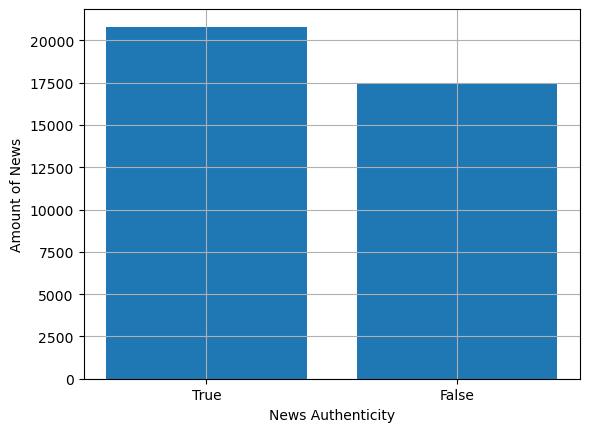

In [44]:
valcnt = news['true'].value_counts()
plt.grid()
plt.bar(valcnt.index.astype(str), valcnt.values)
plt.xlabel('News Authenticity')
plt.ylabel('Amount of News')

#### Which word occurs the most amount of times in the articles?

In [45]:
wrd = [x for sublist in news['tkn_text'] for x in sublist]
Counter(wrd)

print("The most common word in all articles is:", Counter(wrd).most_common(1)[0][0], "and it occurs", Counter(wrd).most_common(1)[0][1], "times in the articles.")

The most common word in all articles is: said and it occurs 118832 times in the articles.


Similiar as above.

#### Plot a world cloud for all the words in all articles combined.

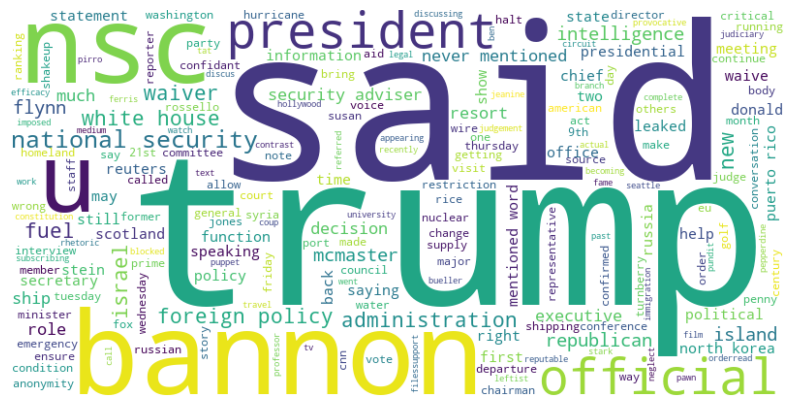

In [46]:
from wordcloud import WordCloud

wrd_str = ' '.join(wrd[0: 1000])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wrd_str)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

For asthetic appeal and reduced clustering, only displayed 1000 words.

### Vectorizing the data

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word')

tfidf_matrix = tfidf.fit_transform(news['text'])

Creating a vectorised TDIDF matrix for the text column.

In [48]:
print(tfidf_matrix)
tfidf_matrix.shape

  (0, 8034)	0.0888970244595048
  (0, 128036)	0.05466761217396979
  (0, 30990)	0.07081975629115704
  (0, 195763)	0.10428088120609048
  (0, 223495)	0.04566061021768275
  (0, 146152)	0.03544740172849239
  (0, 77935)	0.09305024205148874
  (0, 26556)	0.022416378151680686
  (0, 137518)	0.03864494510454919
  (0, 132669)	0.028274940928702412
  (0, 145325)	0.1580134864568999
  (0, 201145)	0.08718566137722987
  (0, 15937)	0.07739584646072455
  (0, 68448)	0.1428279791628839
  (0, 118252)	0.056019715638029016
  (0, 63464)	0.06535802800550208
  (0, 145199)	0.0579152430422033
  (0, 149160)	0.05256811038754658
  (0, 102263)	0.06060728880785739
  (0, 145330)	0.07881130096943528
  (0, 161693)	0.04113192905486402
  (0, 23579)	0.03522010942275393
  (0, 34787)	0.077257046071091
  (0, 72860)	0.05395018329757121
  (0, 91386)	0.021646824718831146
  :	:
  (38254, 219884)	0.01115686447002356
  (38254, 95149)	0.01215901361656489
  (38254, 65201)	0.007429217052524139
  (38254, 146152)	0.027087700671211128
  (382

(38255, 227695)

### Splitting the Data

In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, news['true'], test_size=0.2, random_state=42)

Split the data to form predictor training and testing set and target training and testing set. Splitting it such that 20% is used for testing and 80% is used for training.

### Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

Fitting the data onto a logistic regression model.

In [51]:
log_pred = logmodel.predict(x_test)

Predicting using the model.

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

logprecision = precision_score(y_test, log_pred)
logrecall = recall_score(y_test, log_pred)
logaccuracy = accuracy_score(y_test, log_pred)
logf1 = f1_score(y_test, log_pred)
logroc = roc_auc_score(y_test, log_pred)
logconf = confusion_matrix(y_test, log_pred)
logreport = classification_report(y_test, log_pred)

Evaluating the various scores of the model.

In [53]:
print("Accuracy score of the logistic regression model is:", logaccuracy)

Accuracy score of the logistic regression model is: 0.9875833224415109


In [54]:
print("Precision score of the logistic regression model is:", logprecision)

Precision score of the logistic regression model is: 0.9855689614383724


In [55]:
print("Recall score of the logistic regression model is:", logrecall)

Recall score of the logistic regression model is: 0.991904761904762


In [56]:
print("F1 score of the logistic regression model is:", logf1)

F1 score of the logistic regression model is: 0.9887267117598196


In [57]:
print("ROC-AUC score of the logistic regression model is:", logroc)

ROC-AUC score of the logistic regression model is: 0.987114362986574


In [58]:
print("Confusion matrix of the logistic regression model is:\n\n", logconf)

Confusion matrix of the logistic regression model is:

 [[3390   61]
 [  34 4166]]


In [59]:
print("Classification report of the logistic regression model is:\n\n", logreport)

Classification report of the logistic regression model is:

               precision    recall  f1-score   support

       False       0.99      0.98      0.99      3451
        True       0.99      0.99      0.99      4200

    accuracy                           0.99      7651
   macro avg       0.99      0.99      0.99      7651
weighted avg       0.99      0.99      0.99      7651



<Axes: >

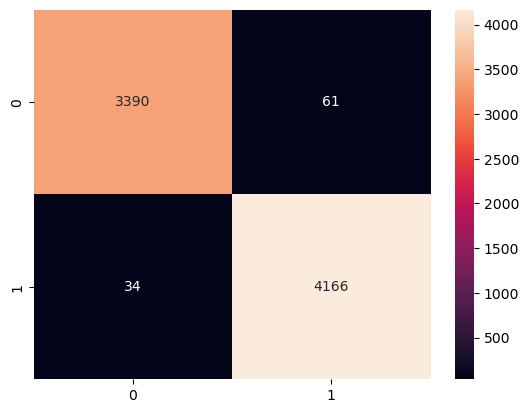

In [60]:
sns.heatmap(logconf, annot=True, fmt='d')

Plotting the heatmap of the confusion matrix of logistic regression model.

### Decision Tree Model

Fitting the data to form a decision tree.

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train, y_train)

DecisionTreeClassifier()

Predicting using the model.

In [62]:
dt_pred = dtmodel.predict(x_test)

In [63]:
dtprecision = precision_score(y_test, dt_pred)
dtrecall = recall_score(y_test, dt_pred)
dtaccuracy = accuracy_score(y_test, dt_pred)
dtf1 = f1_score(y_test, dt_pred)
dtroc = roc_auc_score(y_test, dt_pred)
dtconf = confusion_matrix(y_test, dt_pred)
dtreport = classification_report(y_test, dt_pred)

Evaluating and displaying the various scores of the model.

In [64]:
print("Accuracy score of the decision tree is:", dtaccuracy)

Accuracy score of the decision tree is: 0.9946412233694942


In [65]:
print("Precision score of the decision tree is:", dtprecision)

Precision score of the decision tree is: 0.9940603468757424


In [66]:
print("Recall score of the decision tree is:", dtrecall)

Recall score of the decision tree is: 0.9961904761904762


In [67]:
print("F1 score of the decision tree is:", dtf1)

F1 score of the decision tree is: 0.9951242716137471


In [68]:
print("ROC-AUC score of the decision tree is:", dtroc)

ROC-AUC score of the decision tree is: 0.9944730995846615


In [69]:
print("Confusion matrix of the decision tree is:\n\n", dtconf)

Confusion matrix of the decision tree is:

 [[3426   25]
 [  16 4184]]


In [70]:
print("Classification report of the decision tree is:\n\n", dtreport)

Classification report of the decision tree is:

               precision    recall  f1-score   support

       False       1.00      0.99      0.99      3451
        True       0.99      1.00      1.00      4200

    accuracy                           0.99      7651
   macro avg       0.99      0.99      0.99      7651
weighted avg       0.99      0.99      0.99      7651



Plotting the confusion matrix of the decision tree.

<Axes: >

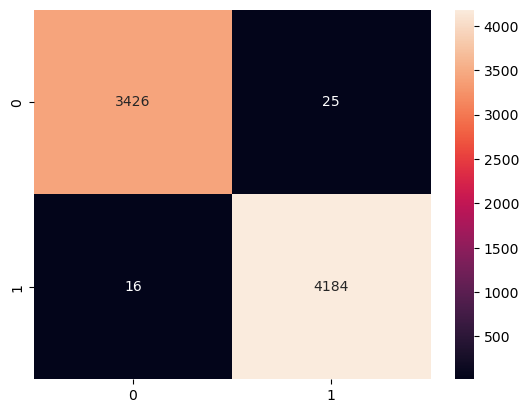

In [71]:
sns.heatmap(dtconf, annot=True, fmt='d')